### Hamilton, James. 1729. _Calculations and Tables Relating to the Attractive Virtue of Loadstones: Serving to the Finding out the Comparative Degrees of Goodness between Several of Them. ... And Also for to Know the Value in Money of Any Loadstone_. London.

![title](hamilton0.jpg)

## The Function

_the Weights they sustain will be as the Squares of the Cube Roots of the Weights of the Loadstones_

$f(x) = (\sqrt[3]{x})^2 = x^{\frac{2}{3}}$

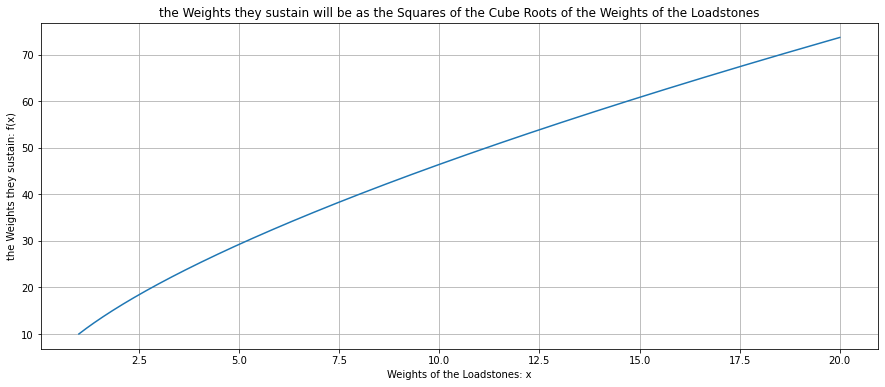

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function with input domain restriction
def square_of_cube_root(x):
    if x >= 0:
        return x**(2/3)*10 # factor 10 for Hamiltons example of a weak magnet (see pp. 4-5)
    else:
        return np.nan  # Return NaN for negative values

# Generate x-values
x = np.linspace(1, 20, 500)

# Calculate y-values
y = [square_of_cube_root(xi) for xi in x]

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the function
plt.plot(x, y)
plt.title("the Weights they sustain will be as the Squares of the Cube Roots of the Weights of the Loadstones")
plt.xlabel("Weights of the Loadstones: x")
plt.ylabel("the Weights they sustain: f(x)")
plt.grid(True)
plt.show()


## Derivation:

$f'(x) = \frac{2}{3\cdot x\frac{1}{3}}$



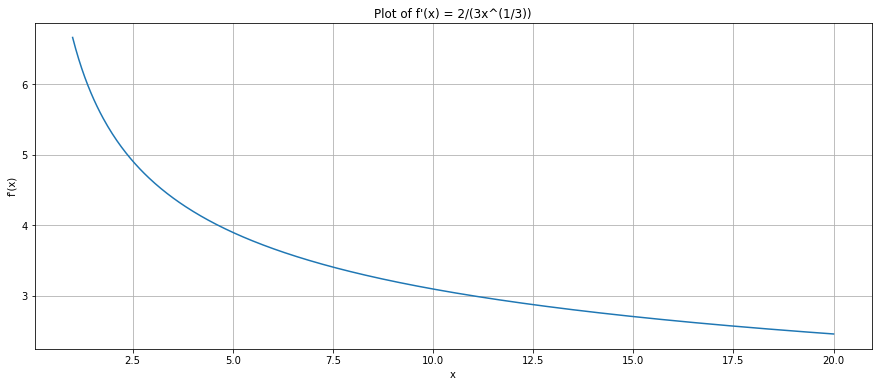

In [2]:
# Define the derivative function
def derivative_of_cube_root(x):
    return (20 / (3 * x**(1/3)))

# Generate x-values
x = np.linspace(1, 20, 500)

# Calculate y-values
y = derivative_of_cube_root(x)

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the derivative function
plt.plot(x, y)
plt.title("Plot of f'(x) = 2/(3x^(1/3))")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.show()


## The Table

In [3]:
import pandas as pd
from tabulate import tabulate

# Define the functions
def square_of_cube_root(x):
    return x**(2/3)*10

def derivative_of_cube_root(x):
    return (20 / (3 * x**(1/3)))

# Generate x-values in 1
x_values = np.arange(1, 21, 1)

# Calculate y-values, derivative values, and the ratio
y_values = np.round(square_of_cube_root(x_values),2)
derivative_values = derivative_of_cube_root(x_values)
ratio_values = np.round(y_values / x_values, 3)

# Create the table as a DataFrame
table = pd.DataFrame({'how often its weight': ratio_values,
                      'Loadstone (Grains)': x_values,
                      'Weight sustain\'d': y_values})

# Convert the DataFrame to a formatted table
table_str = tabulate(table, headers='keys', tablefmt='pipe')

# Print the formatted table
#print(table_str)
table.head(19)



,how often its weight,Loadstone (Grains),Weight sustain'd
0,10.000,1,10.00
1,7.935,2,15.87
2,6.933,3,20.80
3,6.300,4,25.20
4,5.848,5,29.24
5,5.503,6,33.02
6,5.227,7,36.59
7,5.000,8,40.00
8,4.808,9,43.27
9,4.642,10,46.42


![title](hamilton1.jpg)

## Synopsis

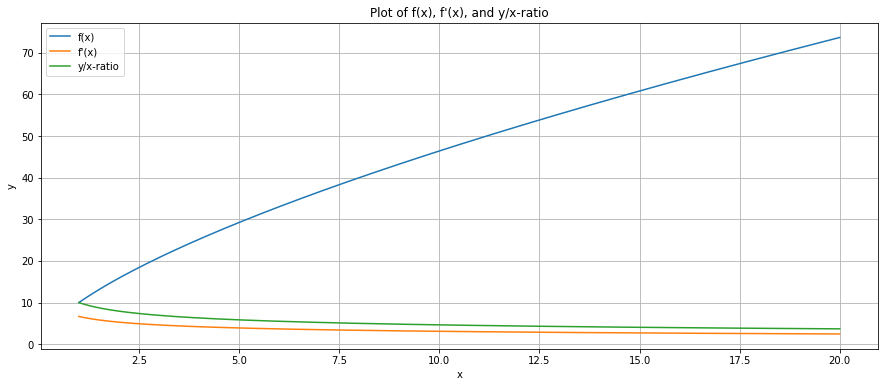

In [4]:
# Define the functions
def square_of_cube_root(x):
    return x**(2/3)*10

def derivative_of_cube_root(x):
    return (20 / (3 * x**(1/3)))

# Generate x-values
x = np.linspace(1, 20, 500)

# Calculate y-values for the function and its derivative
y = square_of_cube_root(x)
derivative = derivative_of_cube_root(x)
ratio = y / x

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the plot
plt.plot(x, y, label="f(x)")
plt.plot(x, derivative, label="f'(x)")
plt.plot(x, ratio, label="y/x-ratio")
plt.title("Plot of f(x), f'(x), and y/x-ratio")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Calculate for different loadstone

Hamilton's example: A stone of 5 Pennywt. and 19 Grains sustains 23760 grains. He says this weight (`5 Pennywt. and 19 Grains`) would sustain $268,33$ grains in his table, hence let's calculate the weight in grains instead of using the table to tranform the unit.

Let $(x^\frac{2}{3} \cdot 10) = 268.33$

Hence $x = (26.833)^\frac{2}{3} = \frac{26833 \cdot \sqrt{\frac{26833}{10}}}{10000} ≈ 139$

Applying the rules layed out in pp. 4-6 we will divide 23760 grains by $(x^\frac{2}{3} \cdot 10)$ with $x = 139$, i.e. $\frac{23760}{268,33}$

The quotient then is $~ 88.54$. This quotient will be multiplied with any $f(x)$ to deliver the actual `weight sustained` for the different loadstone

Hamliton says that a piece of 15 Grains of this different magnet would then sustain 5385 Grains:

In [15]:
def cube_root(x):
    return (x**(2/3) * 10)

def cube_root_quot(x, sustained):
    return sustained / cube_root(x)
    
def cube_root_new(x):
    return cube_root(x) * cube_root_quot(139, 23760)

def cube_root_one(x,weight,sustained):
    return (x**(2/3)) * (sustained /(weight**(2/3)))

print(cube_root_new(15))
print(cube_root_one(15,139,23760))

5385.558431197362
5385.558431197362


## A 4D plot (using color coding)

(the yellow corner is the area for the stronger magnets, so to speak)

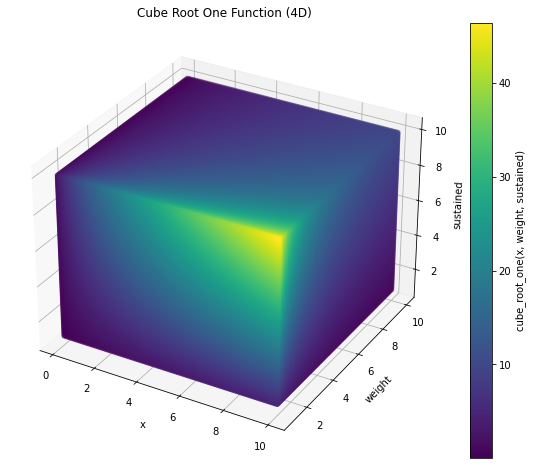

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def cube_root_one(x, weight, sustained):
    return (x**(2/3) * 10) * (sustained / (weight**(2/3) * 10))

x = np.linspace(0.1, 10, 100)
weight = np.linspace(1, 10, 100)
sustained = np.linspace(1, 10, 100)

# Create a grid of x, weight, and sustained values
X, Weight, Sustained = np.meshgrid(x, weight, sustained, indexing='ij')

# Calculate the corresponding function values
Y = cube_root_one(X, Weight, Sustained)

# Define the color mapping based on the fourth dimension (Y)
color_map = plt.cm.viridis

# Plot the 4D function using scatter plot and color mapping
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Weight, Sustained, c=Y, cmap=color_map)
fig.colorbar(scatter, label='cube_root_one(x, weight, sustained)')

ax.set_xlabel('x')
ax.set_ylabel('weight')
ax.set_zlabel('sustained')
ax.set_title('Cube Root One Function (4D)')

plt.show()

## 3D animation for the given example

(red dot shows the given example)

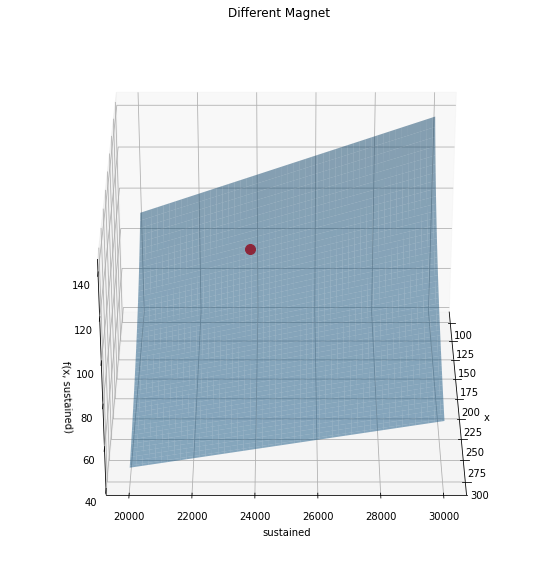

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

def derivative_of_cube_root(x, sustained):
    return sustained / (x**(2/3) * 10)

x_range = np.linspace(100, 300, 100)
sustained_range = np.linspace(20000, 30000, 100)
x, sustained = np.meshgrid(x_range, sustained_range)
z = derivative_of_cube_root(x, sustained)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, sustained, z, alpha=0.5)
highlight_x = 139
highlight_sustained = 23760
highlight_z = derivative_of_cube_root(highlight_x, highlight_sustained)

ax.scatter(highlight_x, highlight_sustained, highlight_z, color='red', s=100, label='different magnet', zorder=10)

ax.set_xlabel('x')
ax.set_ylabel('sustained')
ax.set_zlabel('f(x, sustained)')

ax.set_title('Different Magnet')

# plt.show()

# Function to update the plot for each frame
def update_rotation(frame):
    ax.view_init(elev=30, azim=frame)
    return ax

# Create the animation
animation = FuncAnimation(fig, update_rotation, frames=range(0, 360), interval=30)

# Save the animation as a GIF
animation.save('rotation.gif', writer='pillow')

# Display the GIF in the notebook
HTML('<img src="rotation.gif">')
